In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder

## Loading Data

In [4]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
# далее доавляем настройку, чтобы были видны все колонки на экране
pd.set_option('display.max_columns', None)
# удаляем колонку ID
df.drop(columns='ID', inplace=True)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [5]:
df.shape

(129880, 23)

In [6]:
df.describe().round(2)

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.00,129880.00,129880.00,129487.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00
mean,39.43,1190.32,14.71,15.09,3.06,2.76,3.31,3.25,2.98,3.38,3.44,3.35,3.29,3.20,3.64,2.73,3.36,3.63
std,15.12,997.45,38.07,38.47,1.53,1.40,1.27,1.35,1.28,1.29,1.32,1.32,1.31,1.33,1.18,1.33,1.33,1.18
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,27.00,414.00,0.00,0.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00
50%,40.00,844.00,0.00,0.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,4.00
75%,51.00,1744.00,12.00,13.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00
max,85.00,4983.00,1592.00,1584.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [7]:
df.dtypes

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


## Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [9]:
# Ищем количество и в каких колонках есть нулевые значения (Arrival Delay = 393)
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [10]:
df['Arrival Delay']

0          5.0
1         39.0
2          0.0
3          0.0
4          1.0
          ... 
129875     3.0
129876     0.0
129877    14.0
129878    22.0
129879     0.0
Name: Arrival Delay, Length: 129880, dtype: float64

In [11]:
df['Arrival Delay'].mean()

np.float64(15.09112883918849)

In [12]:
# Заполняем пыстые значения средними значениями задержки рейсов:
df['Arrival Delay'].fillna(df['Arrival Delay'].mean(), inplace=True)

In [13]:
# Теперь Null-значений нет ни в одной из колонок:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

## Charts

<function matplotlib.pyplot.show(close=None, block=None)>

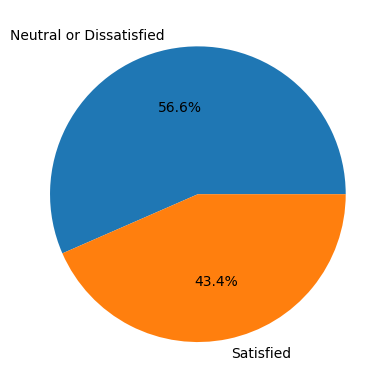

In [14]:
plt.pie(df['Satisfaction'].value_counts(), labels=['Neutral or Dissatisfied', 'Satisfied'], autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

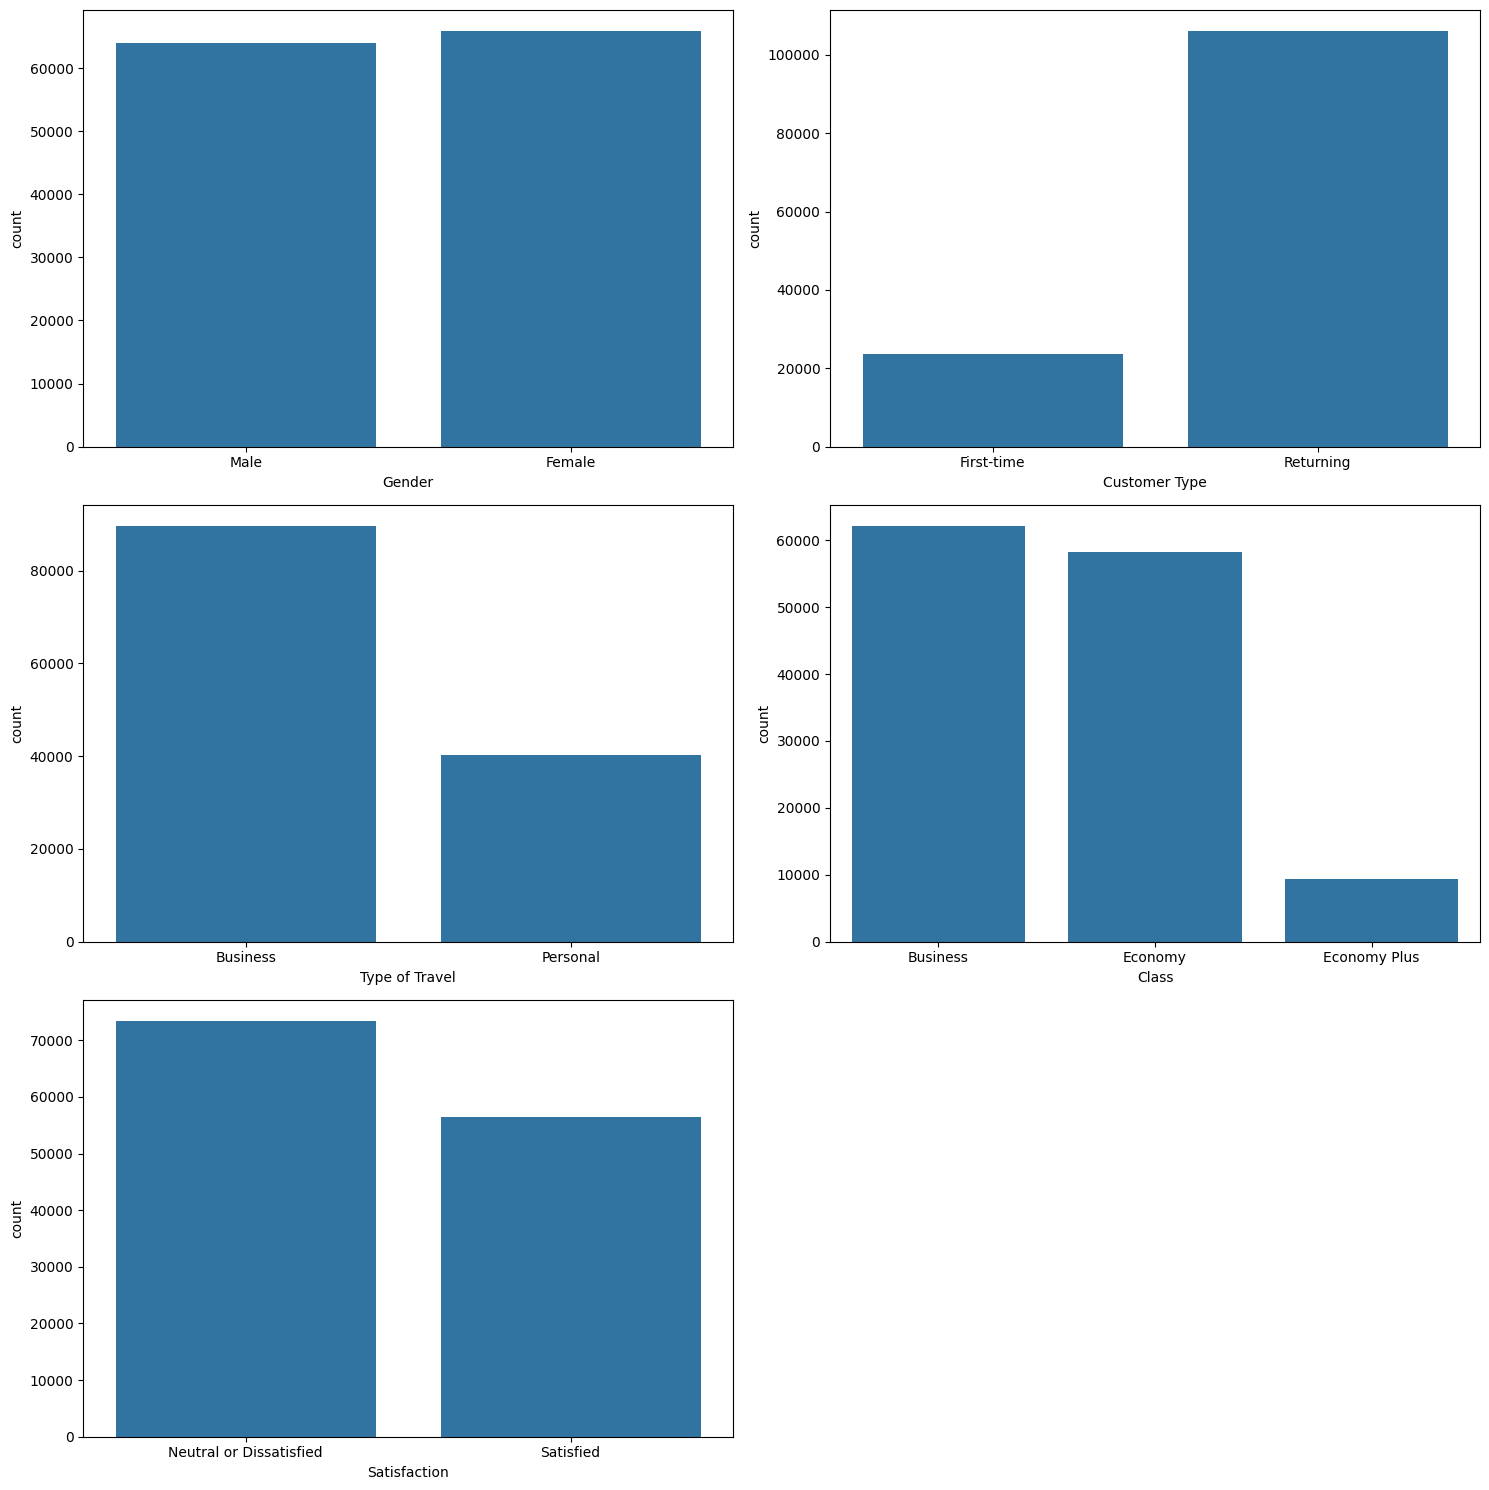

In [15]:
cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
plt.figure(figsize=(15, 15))

for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title = f"Count of {col}"

plt.tight_layout()
plt.show

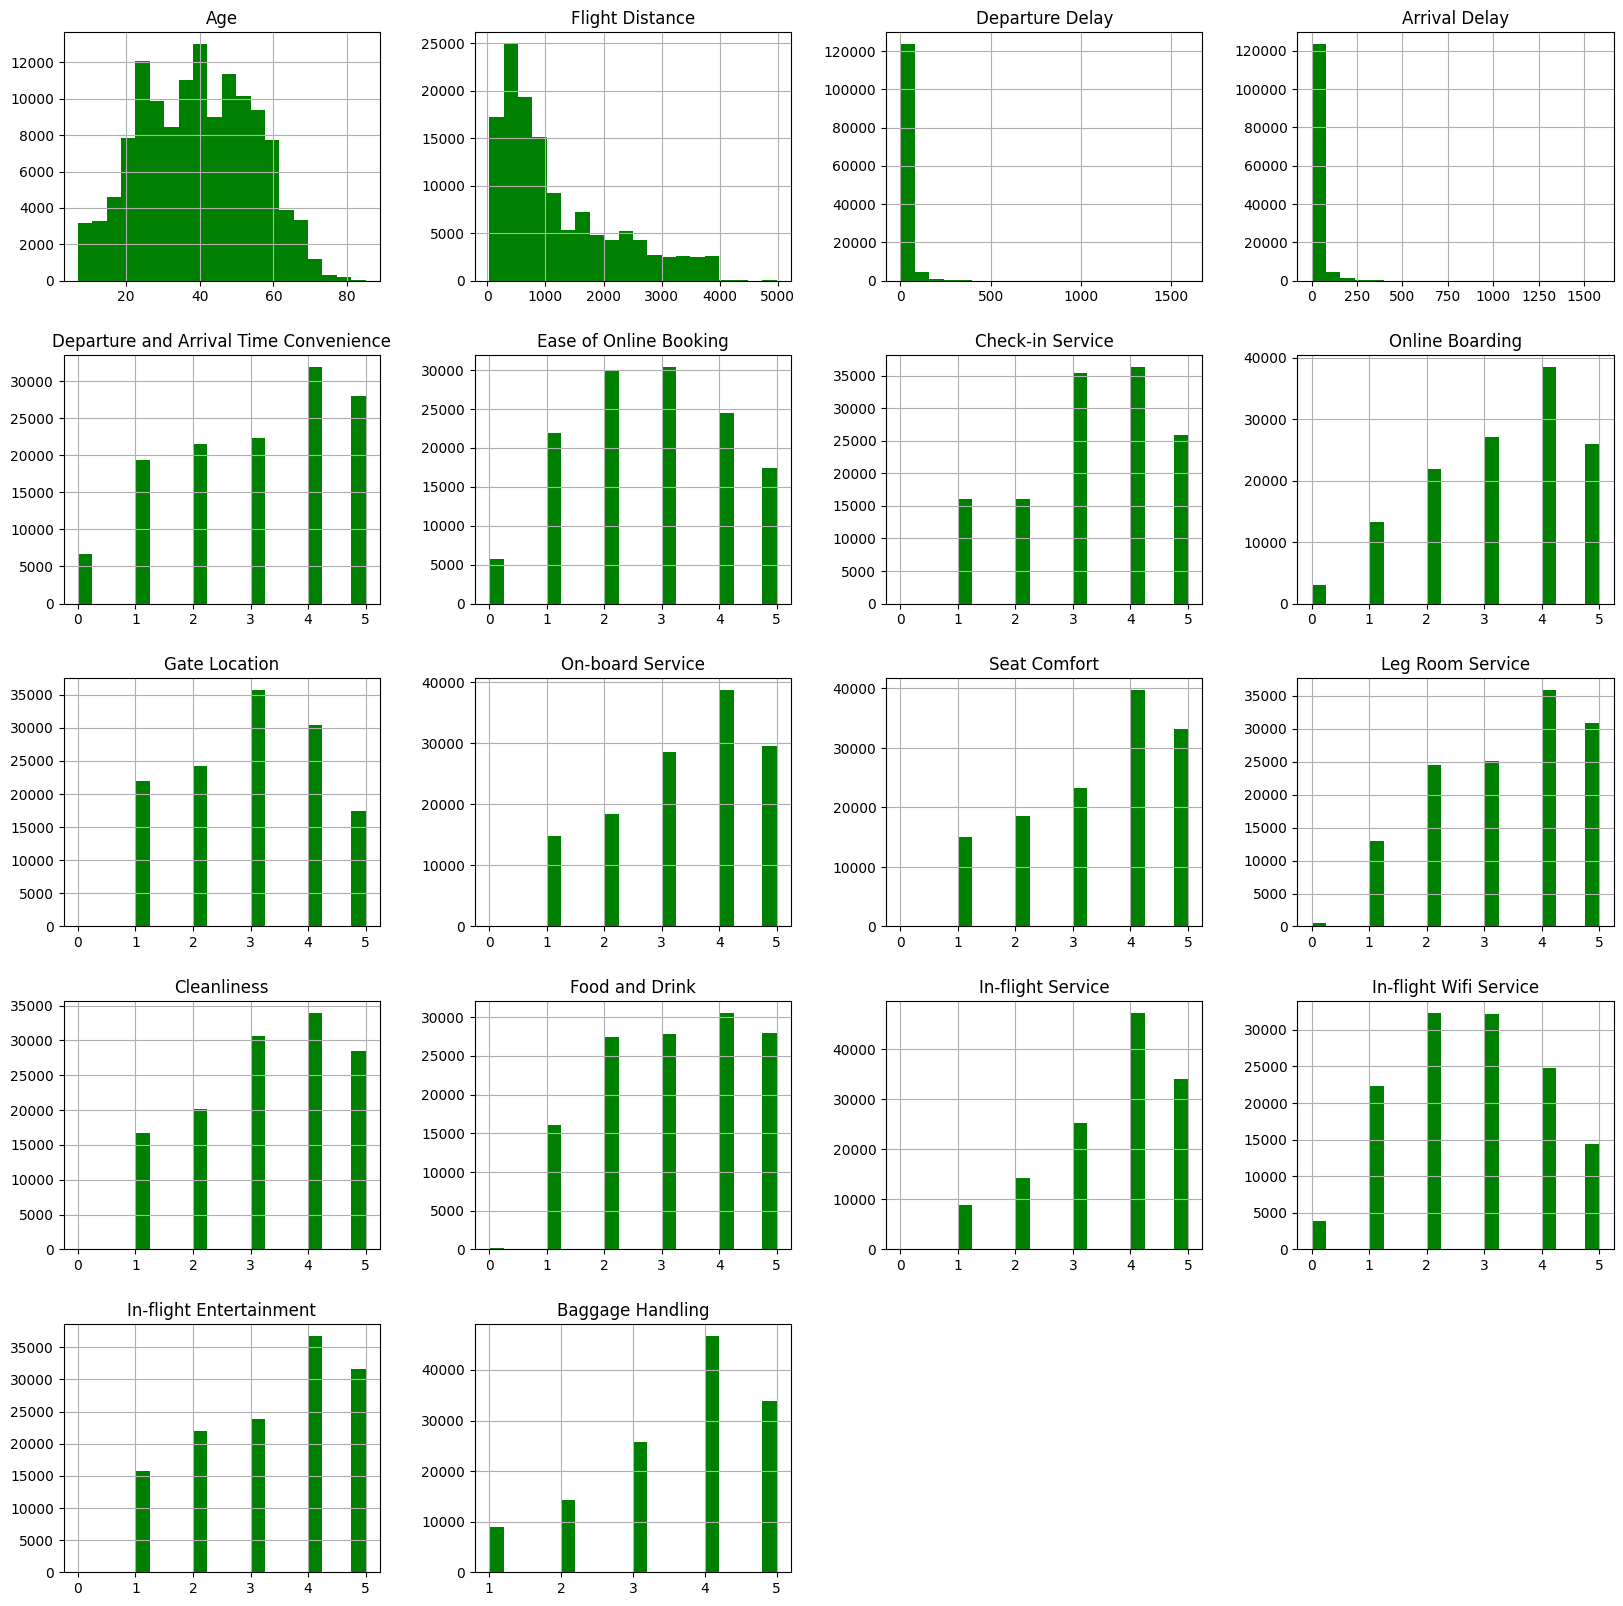

In [16]:
df.hist(bins=20, figsize=(20, 20), color='green')
plt.show()

## Column Data Encoding

In [17]:
# Находим колонки, содержащие тип данных 'object':
df.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')

In [18]:
# Находим уникальные значения для каждой из колонок типа object
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [20]:
df['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

In [21]:
df['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [22]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [23]:
## OPTION 1
label_encoder = LabelEncoder()
columns = df.select_dtypes(include='object').drop(columns='Satisfaction').columns

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head(3)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied


In [24]:
## OPTION 2
# df.replace({
#     'Gender': {
#         'Male': 0,
#         'Female': 1
#     },
#     'Customer Type': {
#         'First-time': 1,
#         'Returning': 2
#     },
#     'Type of Travel': {
#         'Business': 1,
#         'Personal': 2
#     },
#     'Class': {
#         'Business': 1,
#         'Economy': 2,
#         'Economy Plus': 3
#     },
# }, inplace=True)

In [25]:
df.head(3)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied


## Additional Charts

In [26]:
# Значения корреляции в таблице для графика
df.drop(columns='Satisfaction').corr()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Gender,1.000000,0.008996,0.030958,0.009503,-0.011574,0.003616,0.003491,0.001307,0.008995,0.005893,0.008462,-0.045022,-0.000863,0.006447,-0.030756,0.031047,0.002867,0.001730,0.038504,0.005901,0.003843,0.036356
Age,0.008996,1.000000,0.284172,-0.044808,-0.116921,0.099459,-0.009041,-0.011229,0.036960,0.022565,0.033475,0.207572,-0.000398,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991
Customer Type,0.030958,0.284172,1.000000,0.308236,-0.042994,0.226021,-0.003859,-0.004724,0.206873,0.018059,0.031243,0.189083,-0.004465,0.054172,0.156239,0.046841,0.081302,0.056997,-0.023292,0.005757,0.106001,-0.024874
Type of Travel,0.009503,-0.044808,0.308236,1.000000,0.486718,-0.266792,-0.005913,-0.005820,0.257102,-0.134078,0.016247,-0.224020,-0.029869,-0.059794,-0.127717,-0.139612,-0.084615,-0.068986,-0.023538,-0.105865,-0.152936,-0.033012
Class,-0.011574,-0.116921,-0.042994,0.486718,1.000000,-0.426925,0.009530,0.014141,0.087152,-0.095138,-0.157494,-0.297645,-0.005701,-0.210649,-0.212334,-0.198825,-0.129623,-0.080773,-0.159285,-0.024962,-0.183162,-0.166588
Flight Distance,0.003616,0.099459,0.226021,-0.266792,-0.426925,1.000000,0.002402,-0.001932,-0.018914,0.065165,0.073608,0.214825,0.005520,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855
Departure Delay,0.003491,-0.009041,-0.003859,-0.005913,0.009530,0.002402,1.000000,0.960329,0.000778,-0.005318,-0.018752,-0.019404,0.005973,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105
Arrival Delay,0.001307,-0.011229,-0.004724,-0.005820,0.014141,-0.001932,0.960329,1.000000,-0.000941,-0.007022,-0.021671,-0.022694,0.005649,-0.034735,-0.030472,0.011327,-0.016520,-0.031666,-0.059759,-0.017721,-0.030187,-0.007923
Departure and Arrival Time Convenience,0.008995,0.036960,0.206873,0.257102,0.087152,-0.018914,0.000778,-0.000941,1.000000,0.437620,0.091132,0.072287,0.447510,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833
Ease of Online Booking,0.005893,0.022565,0.018059,-0.134078,-0.095138,0.065165,-0.005318,-0.007022,0.437620,1.000000,0.008819,0.404866,0.460041,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148


<function matplotlib.pyplot.show(close=None, block=None)>

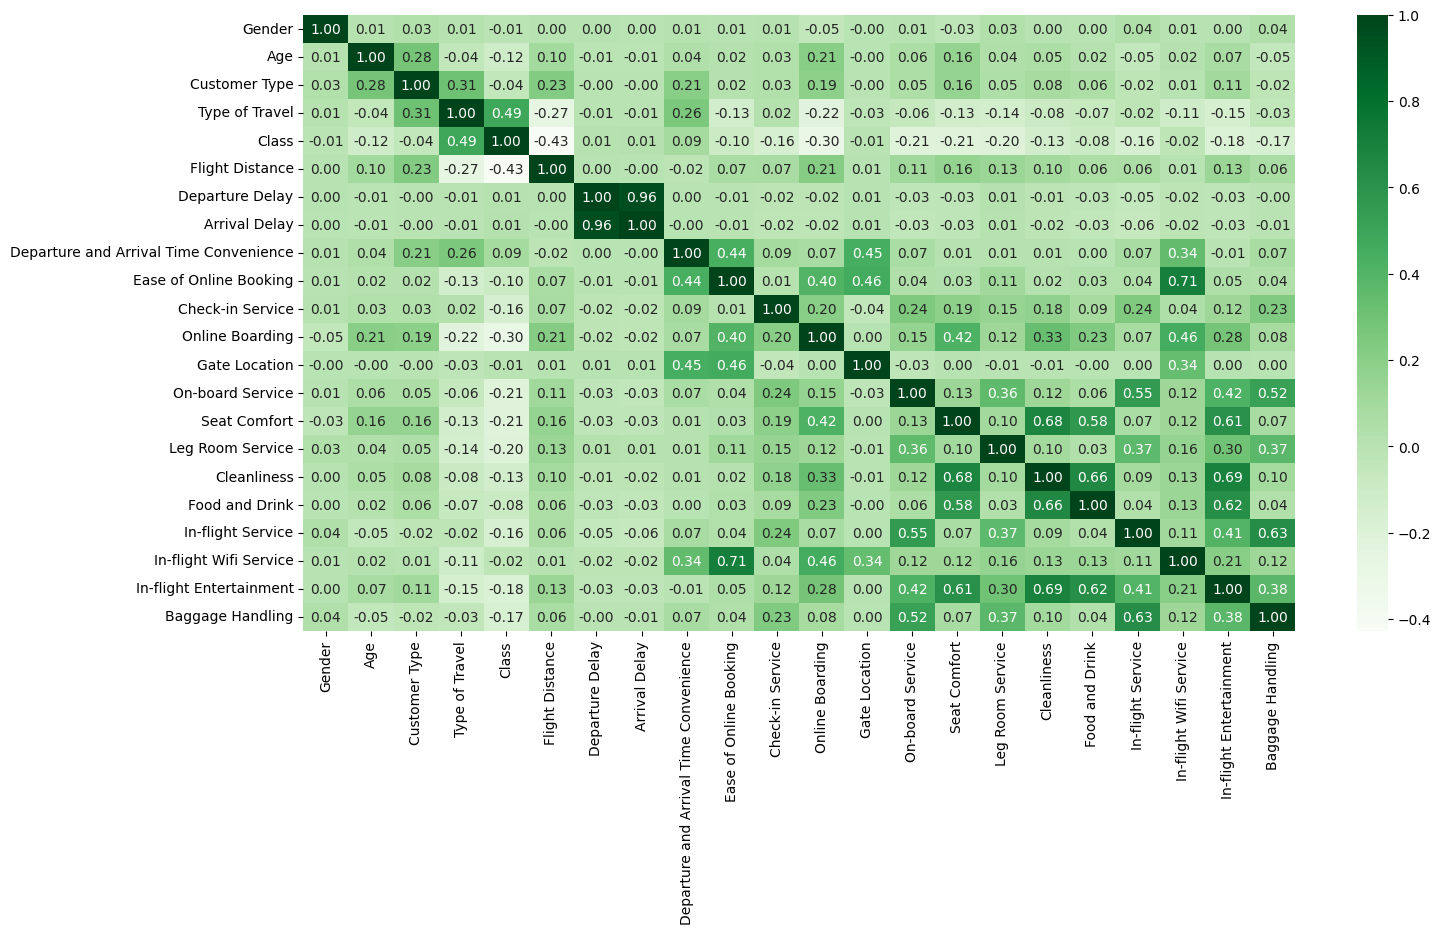

In [27]:
# Корреляция показывает насколько одна колонка зависит от другой:
plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns='Satisfaction').corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show

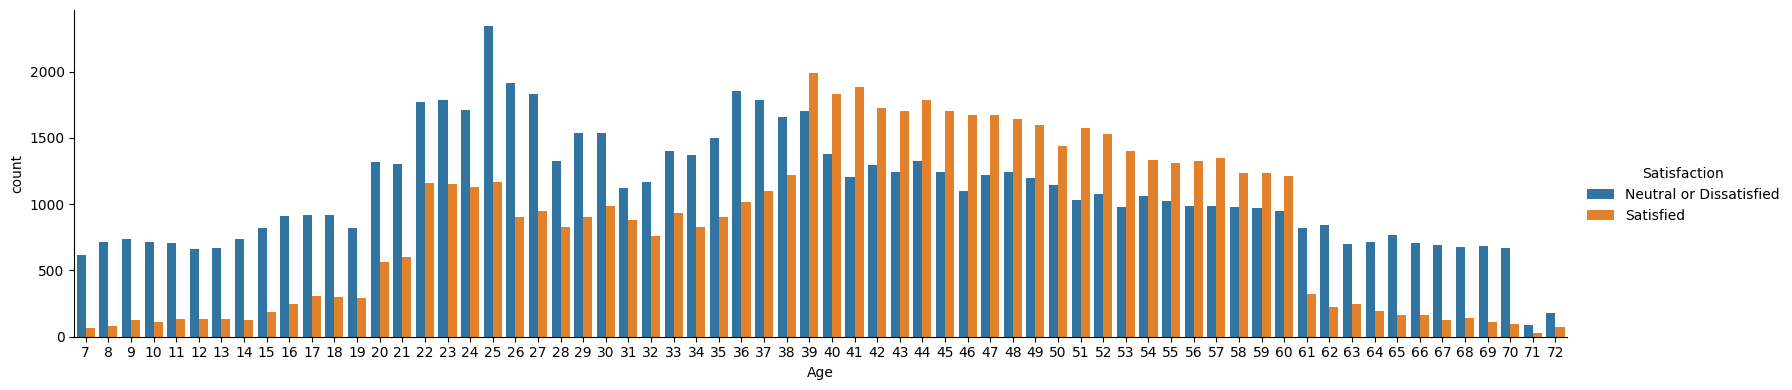

In [28]:
# Распределение удовлетворенности по возврасту (легенда='Satisfaction'),
# ограничение диаграммы по возрасту от 7 до 73

sns.catplot(data=df, x="Age", height=4, aspect=4, kind='count', hue='Satisfaction', order=range(7, 73))
plt.show()

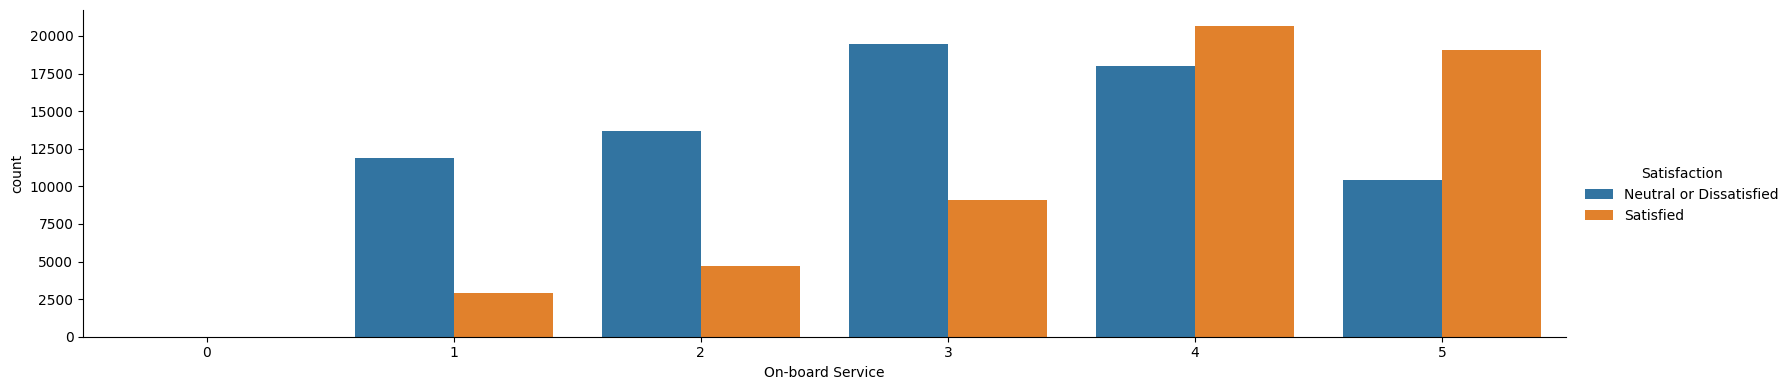

In [29]:
# Распределение удовлетворенности по 'On-board Service' -оценке сервиса на борту

sns.catplot(data=df, x="On-board Service", height=4, aspect=4, kind='count', hue='Satisfaction')
plt.show()

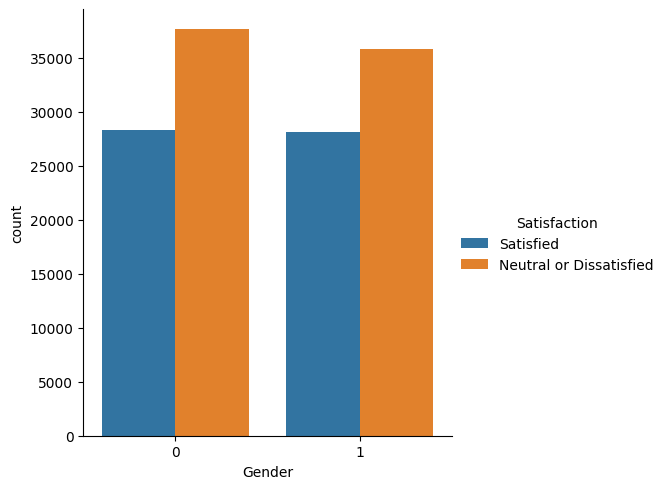

In [30]:
# Распределение удовлетворенности по 'Gender'

sns.catplot(data=df, x="Gender", height=5, aspect=1, kind='count', hue='Satisfaction')
plt.show()

## Filtering Data

In [31]:
df[['Gender', 'Age', 'Type of Travel']].head(3)

,Gender,Age,Type of Travel
0,1,48,0
1,0,35,0
2,1,41,0


In [32]:
df.loc[2:5, ['Gender', 'Age', 'Flight Distance']]

,Gender,Age,Flight Distance
2,1,41,853
3,1,50,1905
4,0,49,3470
5,1,43,3788


In [33]:
df.loc[df['Age']>50, ['Gender', 'Age', 'Flight Distance']].head(3)

,Gender,Age,Flight Distance
7,0,60,853
14,1,52,853
15,1,70,821


In [34]:
df.loc[df['Gender']==1, ['Gender', 'Age', 'Flight Distance']].head(3)

,Gender,Age,Flight Distance
0,1,48,821
2,1,41,853
3,1,50,1905


In [35]:
df.iloc[10:15, 1:7]

,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay
10,28,0,0,0,821,0
11,27,0,0,0,421,20
12,24,0,0,1,453,16
13,9,1,1,0,853,68
14,52,1,1,1,853,0


In [36]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [37]:
df.index

RangeIndex(start=0, stop=129880, step=1)

## Models

In [38]:
# Отбираем для оси Х только цифровые значения - int или float
X = df.drop(columns='Satisfaction')
X.head(3)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3


In [39]:
y = df['Satisfaction']
y.head(3)

0    Neutral or Dissatisfied
1                  Satisfied
2                  Satisfied
Name: Satisfaction, dtype: object

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(129880, 22)

In [42]:
X_train.shape

(103904, 22)

In [43]:
X_test.shape

(25976, 22)

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
predictions = model.predict(X_test)
predictions

array(['Neutral or Dissatisfied', 'Neutral or Dissatisfied',
       'Neutral or Dissatisfied', ..., 'Neutral or Dissatisfied',
       'Satisfied', 'Neutral or Dissatisfied'],
      shape=(25976,), dtype=object)

In [46]:
len(predictions)

25976

In [47]:
# Проверка точности обученной модели прогнозирования (~95%)
model_score = accuracy_score(y_test, predictions)
model_score

0.9450646750846936

### Random Forest

In [48]:
# Применения классификатора RandomForestClassifier к модели дает более
# точные значения (~96%)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

# Получаем оценки от модели
predictions = model.predict(X_test)
predictions

# Измеряем точность результата
model_score = accuracy_score(y_test, predictions)
model_score

0.9624653526331999

### KNeighborsClassifier

In [49]:
# Применения классификатора KNeighborsClassifier к модели дает 
# точность прогноза горазда хуже предыдущих (~76%)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# аргумент n_neighbors=10 влияет на точность результата
model = KNeighborsClassifier(n_neighbors=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

# Получаем оценки от модели
predictions = model.predict(X_test)
predictions

# Измеряем точность результата
model_score = accuracy_score(y_test, predictions)
model_score

0.7540036957191254

### Logistic Regression

In [50]:
# Применения классификатора LogisticRegression к модели дает 
# точность прогноза также хуже первых двух (~81-87% в зависимости от аргумента классификатора)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# аргумент max_iter=10 влияет на точность результата
model = LogisticRegression(max_iter=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

# Получаем оценки от модели
predictions = model.predict(X_test)
predictions

# Измеряем точность результата
model_score = accuracy_score(y_test, predictions)
model_score

0.8733446258084385

## Prediction without Voting Columns

In [53]:
X = df[['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay']]
X.head(3)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay
0,1,48,0,0,0,821,2,5.0
1,0,35,1,0,0,821,26,39.0
2,1,41,1,0,0,853,0,0.0


In [54]:
y = df['Satisfaction']
y.head(3)

0    Neutral or Dissatisfied
1                  Satisfied
2                  Satisfied
Name: Satisfaction, dtype: object

In [55]:
# Применения классификатора RandomForestClassifier к модели дает более
# точные значения (~96%)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

# Получаем оценки от модели
predictions = model.predict(X_test)
predictions

# Измеряем точность результата
model_score = accuracy_score(y_test, predictions)
model_score

0.7705959347089621

In [57]:
X.iloc[:0].to_dict()

{'Gender': {},
 'Age': {},
 'Customer Type': {},
 'Type of Travel': {},
 'Class': {},
 'Flight Distance': {},
 'Departure Delay': {},
 'Arrival Delay': {}}

In [68]:
# Создаем тестовый датафрейм для прогноза удовлетворенности такого пассажира
test_inputs = {
    'Gender': [1, 0],
     'Age': [35, 25],
     'Customer Type': [0, 1],
     'Type of Travel': [0, 0],
     'Class': [1, 1],
     'Flight Distance': [1200, 600],
     'Departure Delay': [0, 2],
     'Arrival Delay': [0, 0]
}
test_df = pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay
0,1,35,0,0,1,1200,0,0
1,0,25,1,0,1,600,2,0


In [69]:
# Передаем тестовый дата фрейм в в модель предсказания, получаем ответ 
# удовлетворенности таких пассажиров с вероятностью ~76%
model.predict(test_df)

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

## Saving Prediction Model

In [72]:
# Сохраняем обученную модель предсказания в файл с расширением .joblib
import joblib
joblib.dump(model, 'airline_passenger_satisfaction.joblib')

['airline_passenger_satisfaction.joblib']

In [73]:
# Создаем тестовый датафрейм для прогноза удовлетворенности такого пассажира
test_inputs = {
    'Gender': [1, 0],
     'Age': [35, 25],
     'Customer Type': [0, 1],
     'Type of Travel': [0, 0],
     'Class': [1, 1],
     'Flight Distance': [1200, 600],
     'Departure Delay': [0, 2],
     'Arrival Delay': [0, 0]
}
test_df = pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay
0,1,35,0,0,1,1200,0,0
1,0,25,1,0,1,600,2,0


In [74]:
# Запуск обученной модели предсказания из файла с расширением .joblib
train_model = joblib.load('airline_passenger_satisfaction.joblib')
train_model.predict(test_df)

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)